In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('..\\data\\data.xlsx')
data.reset_index(drop=True, inplace=True)

In [3]:
data

ID  Carat Weight              Cut Color Clarity Polish Symmetry  \
0        1          1.10            Ideal     H     SI1     VG       EX   
1        2          0.83            Ideal     H     VS1     ID       ID   
2        3          0.85            Ideal     H     SI1     EX       EX   
3        4          0.91            Ideal     E     SI1     VG       VG   
4        5          0.83            Ideal     G     SI1     EX       EX   
...    ...           ...              ...   ...     ...    ...      ...   
5995  5996          1.03            Ideal     D     SI1     EX       EX   
5996  5997          1.00        Very Good     D     SI1     VG       VG   
5997  5998          1.02            Ideal     D     SI1     EX       EX   
5998  5999          1.27  Signature-Ideal     G     VS1     EX       EX   
5999  6000          2.19            Ideal     E     VS1     EX       EX   

     Report  Price  
0       GIA   5169  
1      AGSL   3470  
2       GIA   3183  
3       GIA   4370  
4       GIA   3171  
...     ...    ...  
5995    GIA   6250  
5996    GIA   5328  
5997    GIA   6157  
5998    GIA  11206  
5999    GIA  30507  

[6000 rows x 9 columns]

In [57]:
print(data.info())
print('-------------------------------------------')
print(f'{data.duplicated().sum(): 20}')
print('-------------------------------------------')
print(f'{data.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   Carat Weight  6000 non-null   float64
 2   Cut           6000 non-null   object 
 3   Color         6000 non-null   object 
 4   Clarity       6000 non-null   object 
 5   Polish        6000 non-null   object 
 6   Symmetry      6000 non-null   object 
 7   Report        6000 non-null   object 
 8   Price         6000 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 422.0+ KB
None
-------------------------------------------
                   0
-------------------------------------------
ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [4]:
train_data = data.drop('ID', axis=1)

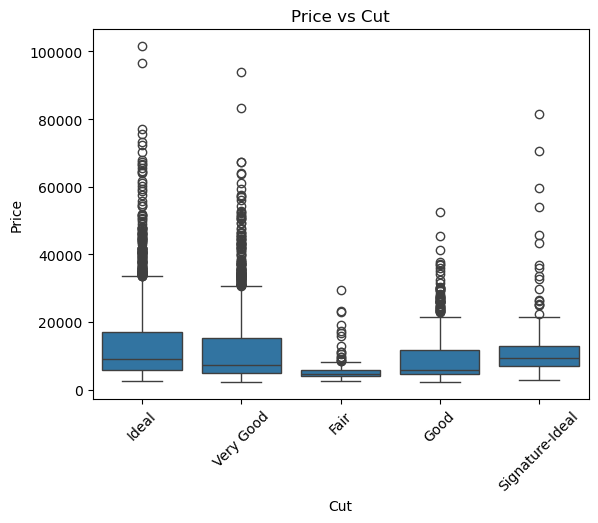

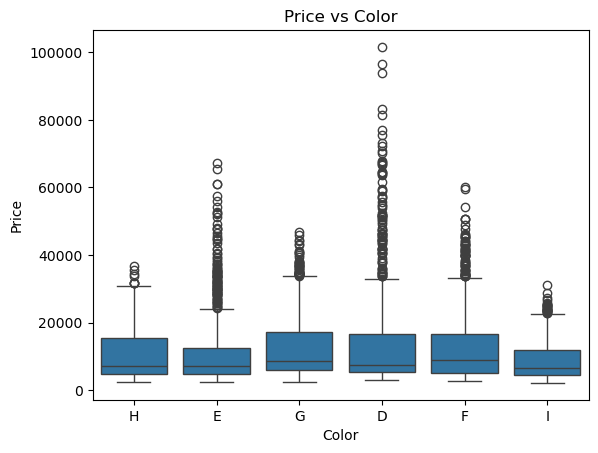

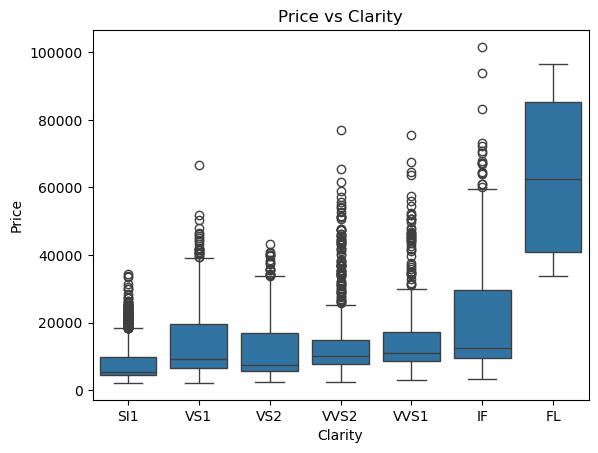

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cut vs Price
sns.boxplot(x='Cut', y='Price', data=train_data)
plt.title('Price vs Cut')
plt.xticks(rotation=45)
plt.show()

# Color vs Price
sns.boxplot(x='Color', y='Price', data=train_data)
plt.title('Price vs Color')
plt.show()

# Clarity vs Price
sns.boxplot(x='Clarity', y='Price', data=train_data)
plt.title('Price vs Clarity')
plt.show()


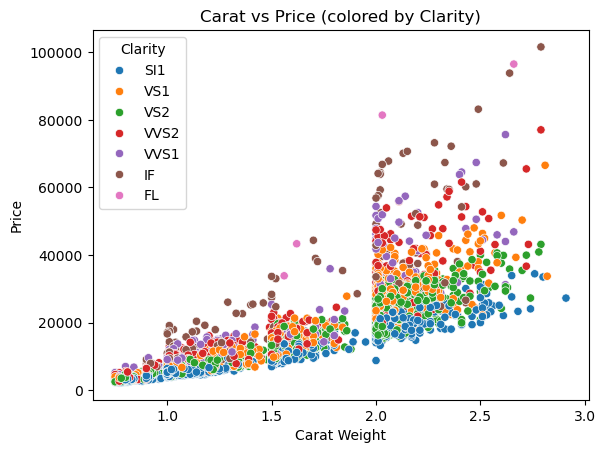

In [64]:
sns.scatterplot(x='Carat Weight', y='Price', hue='Clarity', data=train_data)
plt.title('Carat vs Price (colored by Clarity)')
plt.show()


In [107]:
train_data['Clarity'].value_counts()

Clarity
SI1     2059
VS2     1575
VS1     1192
VVS2     666
VVS1     285
IF       219
FL         4
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# –û–±–æ–∑–Ω–∞—á–∞–µ–º —Ñ–∏—á–∏ –∫–æ—Ç–æ—Ä—ã–µ —Ö–æ—Ç–∏–º —ç–Ω–∫–æ–¥–∏—Ç—å
categorical_columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
numerical_columns = ['Carat Weight']


# –†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ X, y –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = train_data.drop('Price', axis=1)
y = train_data['Price']


# –°–æ–∑–¥–∞–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)

# –î–µ–ª–∞–µ–º –Ω–æ–≤—ã–π X. 
X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1984)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
# –ß—Ç–æ –±—ã —É–≤–∏–¥–µ—Ç—å –∫–∞–∫ –≤—ã–≥–ª—è–¥—è—Ç —Ç–∞–±–ª–∏—Ü–∞ –ø–æ—Å–ª–µ —ç–Ω–∫–æ–¥–∏–Ω–≥–∞ 
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
final_feature_names = list(encoded_feature_names) + numerical_columns
final_feature_names

['Cut_Good',
 'Cut_Ideal',
 'Cut_Signature-Ideal',
 'Cut_Very Good',
 'Color_E',
 'Color_F',
 'Color_G',
 'Color_H',
 'Color_I',
 'Clarity_IF',
 'Clarity_SI1',
 'Clarity_VS1',
 'Clarity_VS2',
 'Clarity_VVS1',
 'Clarity_VVS2',
 'Polish_G',
 'Polish_ID',
 'Polish_VG',
 'Symmetry_G',
 'Symmetry_ID',
 'Symmetry_VG',
 'Report_GIA',
 'Carat Weight']

In [7]:
prediction = model.predict(X_encoded)

In [8]:
train_data['Predicted'] = prediction
train_data['value_score'] = train_data['Predicted'] / train_data['Price']

In [9]:
#–õ—É—á—à–∏–µ –≤–∞—Ä–∏–Ω–∞–Ω—Ç –µ—Å–ª–∏ —Å–º–æ—Ç—Ä–∏–º —Å –û–≥—Ä–Ω–∞–∫–æ–π —É—Ä–æ–≤–Ω—è "–ò–¥–µ–∞–ª—å–Ω–æ"
train_data[(train_data['value_score'] > 1) & (train_data['Cut'] == 'Signature-Ideal') & (train_data['Clarity'] == 'IF')]

Carat Weight              Cut Color Clarity Polish Symmetry Report  \
3330          1.51  Signature-Ideal     G      IF     ID       ID   AGSL   
4730          2.06  Signature-Ideal     I      IF     ID       ID   AGSL   

      Price     Predicted  value_score  
3330  18806  19043.587500     1.012634  
4730  25354  28158.258333     1.110604

In [10]:
# –õ—É—á—à–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –µ—Å–ª–∏ —Å–º–æ—Ç—Ä–∏–º –ø–æ –Ω–µ–¥–æ–æ—Ü–µ–Ω–æ—Å—Ç–∏ –∫–∞–º–Ω—è –ø–æ –º–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ 
train_data.sort_values(by='value_score', ascending=False).head(5)


Carat Weight              Cut Color Clarity Polish Symmetry Report  \
2995          1.91        Very Good     F      IF      G        G    GIA   
971           2.43            Ideal     I      IF     EX       EX    GIA   
5985          2.43            Ideal     I      IF     EX       VG    GIA   
4529          2.31            Ideal     I      IF     EX       EX    GIA   
448           1.62  Signature-Ideal     F     VS1     ID       ID   AGSL   

      Price  Predicted  value_score  
2995  28557   46295.22     1.621151  
971   25897   40869.96     1.578174  
5985  26638   40648.73     1.525968  
4529  24817   37774.21     1.522110  
448   19661   29001.57     1.475081

In [11]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# –ú–µ—Ç—Ä–∏–∫–∏
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# –î–ª—è train
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# –î–ª—è test
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MAE: {mae_train:.2f}, R¬≤: {r2_train:.4f}")
print(f"Test  MAE: {mae_test:.2f}, R¬≤: {r2_test:.4f}")


Train MAE: 321.14, R¬≤: 0.9954
Test  MAE: 763.74, R¬≤: 0.9723


In [12]:
# –î–æ–±–∞–≤–∏–ª –ø—Ä–æ–≤–µ—Ä–∫—É –º–µ—Ç—Ä–∏–∫ —á—Ç–æ –±—ã –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ –º–æ–∂–Ω–æ –¥–æ–≤–µ—Ä–∏—è—Ç—å –º–æ–¥–µ–ª–∏ 


y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤:   {r2:.4f}")


MAE:  763.74
RMSE: 1647.52
R¬≤:   0.9723


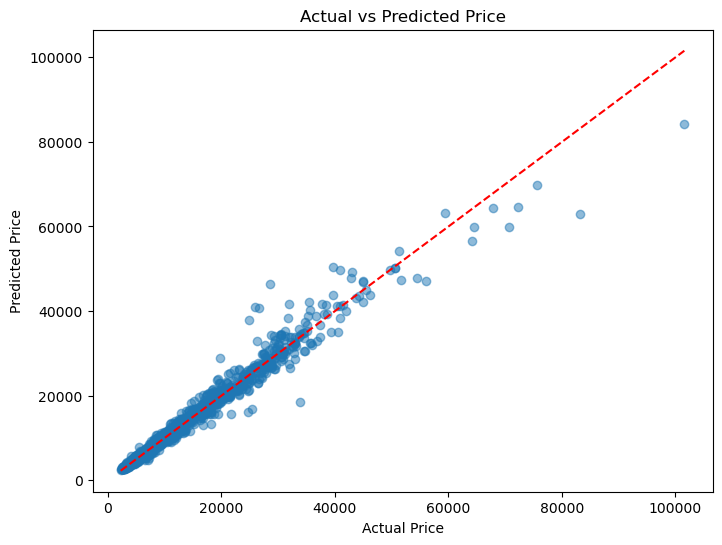

In [13]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥–∏–∫—Ç–æ–≤ –º–æ–¥–µ–ª–∏ –∏ —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –æ–±–æ–±—â–∞–µ—Ç 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


In [39]:
#–ü—Ä–æ—Å—Ç–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –º–æ–¥–µ–ª–∏. –ú–æ–¥–µ–ª—å –∏ —Å —Ä—É—á–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–æ–∫–π —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç



# from xgboost import XGBRegressor
# import optuna
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 700),
#         'max_depth': trial.suggest_int('max_depth', 3, 5),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 0.5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.5),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
#         "eval_metric": 'mae',
#         "early_stopping_rounds": 25,
#         'random_state': 1984
#     }

#     X_t, X_v, y_t, y_v = train_test_split(X_encoded, y, test_size=0.3, random_state=1984)
    
#     model = XGBRegressor(**params)

#     model.fit(
#         X_t, y_t,
#         eval_set=[(X_v, y_v)],
#         verbose=True
#     )

#     preds = model.predict(X_v)
#     mae = mean_absolute_error(y_v, preds)
#     return mae


In [41]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=55)

# print(study.best_params)
# print(study.best_value)

# best_model = XGBRegressor(**study.best_params)
# best_model.fit(X_train, y_train)

# best_predict = best_model.predict(X_test)

# print(f'MAE: {mean_absolute_error(y_test, best_predict): 2f}')
# print(f'RMSE: {np.sqrt(mean_squared_error(y_test, best_predict)): 2f}')
# print(f'R2: {r2_score(y_test, best_predict): 4f}')

MAE:  685.748783
RMSE:  1443.916905
R2:  0.978725


In [42]:
y_pred_xgb = xgb_model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred_xgb): 2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)): 2f}')
print(f'R2: {r2_score(y_test, y_pred_xgb): 4f}')

MAE:  688.807886
RMSE:  1416.195825
R2:  0.979534


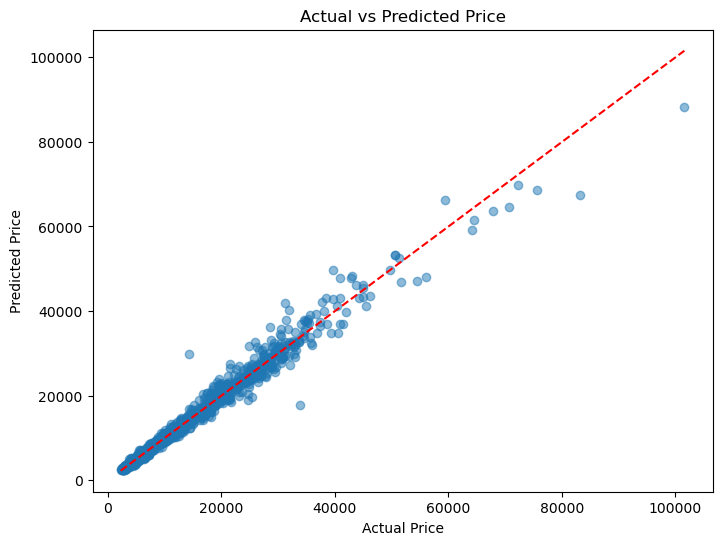

In [16]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥–∏–∫—Ç–æ–≤ –º–æ–¥–µ–ª–∏ –∏ —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –æ–±–æ–±—â–∞–µ—Ç 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# –°–∏–ª—å–Ω–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É XGBRegressor –∏ RandomForestRegressor –Ω–µ—Ç—É


In [17]:
prediction_gxb = model.predict(X_encoded)
train_data['Predicted_xgb'] = prediction_gxb
train_data['value_score_xgb'] = train_data['Predicted_xgb'] / train_data['Price']

In [43]:
#–¢–æ–ø 1 –±—Ä–∏–ª–ª–∏–∞–Ω—Ç –≤—Å–µ —Ç–æ—Ç –∂–µ

train_data.sort_values('value_score_xgb', ascending=False).head(10) 

Carat Weight              Cut Color Clarity Polish Symmetry Report  \
2995          1.91        Very Good     F      IF      G        G    GIA   
971           2.43            Ideal     I      IF     EX       EX    GIA   
5985          2.43            Ideal     I      IF     EX       VG    GIA   
4529          2.31            Ideal     I      IF     EX       EX    GIA   
448           1.62  Signature-Ideal     F     VS1     ID       ID   AGSL   
3306          1.12             Fair     G     VS1     VG        G    GIA   
4684          1.01             Fair     H     VS2     VG       VG    GIA   
1641          2.00        Very Good     H     SI1     EX       EX    GIA   
3134          2.00            Ideal     E    VVS2     VG       VG    GIA   
5778          0.75            Ideal     I     VS2     EX       EX    GIA   

      Price     Predicted  value_score  Predicted_xgb  value_score_xgb  
2995  28557  46295.220000     1.621151   46295.220000         1.621151  
971   25897  40869.960000     1.578174   40869.960000         1.578174  
5985  26638  40648.730000     1.525968   40648.730000         1.525968  
4529  24817  37774.210000     1.522110   37774.210000         1.522110  
448   19661  29001.570000     1.475081   29001.570000         1.475081  
3306   5487   7921.277143     1.443644    7921.277143         1.443644  
4684   4030   5738.840000     1.424030    5738.840000         1.424030  
1641   8803  11547.796667     1.311802   11547.796667         1.311802  
3134  31924  41584.582500     1.302612   41584.582500         1.302612  
5778   2520   3232.232000     1.282632    3232.232000         1.282632

In [48]:
from sklearn.pipeline import Pipeline
import pickle



# üéØ 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
categorical_cols = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
numerical_cols = ['Carat Weight']
target = 'Price'

X = data[categorical_cols + numerical_cols]
y = data[target]

# üéØ 2. –ü–æ—Å—Ç—Ä–æ–∏–º pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

best_model = XGBRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    learning_rate=study.best_params['learning_rate'],
    subsample=study.best_params['subsample'],
    colsample_bytree=study.best_params['colsample_bytree'],
    gamma=study.best_params['gamma'],
    reg_alpha=study.best_params['reg_alpha'],
    reg_lambda=study.best_params['reg_lambda'],
    eval_metric='mae',
    random_state=1984,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', best_model)
])

# üéØ 3. –û–±—É—á–µ–Ω–∏–µ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1984)
pipeline.fit(X_train, y_train)

# ‚úÖ –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
with open('diamond_price_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)